### <b> Trabalho Final - Inteligência Computacional Aplicada (TIP7077) </b>
#### <b> Aluno: Carlos Eduardo Sousa Lima </b>
#### <b> Prof. Guilherme de Alencar Barreto </b>
***

#### <b>Questão 01 - Ajuste Polinomal OLS - Dados Aerogerador </b>

Coeficientes do Polinômio de 4° Ordem

[-0.39132611 10.37288673 -5.00359968  1.43389503 -0.06766974]


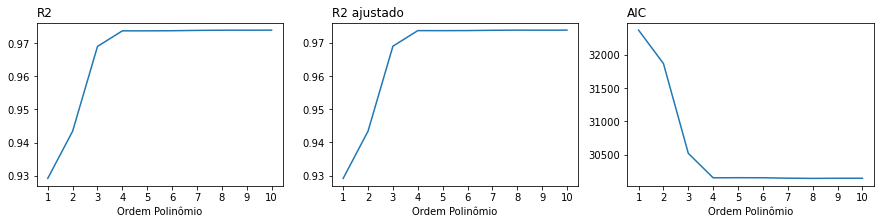

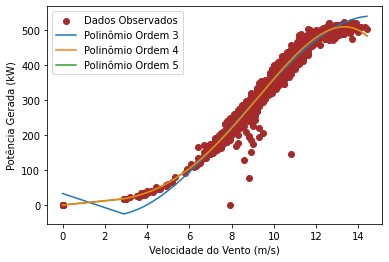

In [58]:
import numpy as np
import matplotlib.pyplot as plt

def R2(y_true, y_pred, n, p):

    coef = 1 - (np.power(y_true-y_pred,2).sum()/np.power(y_true-y_true.mean(),2).sum())
    coef_aj = 1 - (1-coef)*((n-1)/(n-p))
    # coef_aj = 1 - ((n-1)/(n-p)) * (1-coef)
    return (coef, coef_aj)

def AIC(y_true, y_pred, n, p):
    
    AIC = n*np.log(np.power(y_true-y_pred,2).sum()) + 2*p

    return (AIC)

def input_matrix(x, order):
    X = np.empty((x.shape[0], order + 1))
    for i in range(order+1):
        if i == 0:
            X[:,i] = 1
        else:
            X[:,i] = np.power(x,i)
    
    return X

data = np.genfromtxt("aerogerador.dat")
x = data[:,0]
y = data[:,1]

R2_k, R2aj_k, AIC_k, M_k, y_pred_k = [], [], [], [], []

for k in range(1, 10+1):

    X = input_matrix(x, order = k)

    M = np.linalg.lstsq(X,y, rcond = -1)[0]

    y_pred = np.dot(X, M)
    R2_k.append(R2(y, y_pred, X.shape[0], k)[0])
    R2aj_k.append(R2(y, y_pred, X.shape[0], k)[1])
    AIC_k.append(AIC(y, y_pred, X.shape[0], k))
    M_k.append(M)
    y_pred_k.append(y_pred)


fig, axs = plt.subplots(1,3, figsize = (15,3))
axs[0].plot(range(1, 11,1),R2_k)
axs[1].plot(range(1, 11,1),R2aj_k)
axs[2].plot(range(1, 11,1),AIC_k)

axs[0].set_title("R2", loc = "left")
axs[1].set_title("R2 ajustado", loc = "left")
axs[2].set_title("AIC", loc = "left")

axs[0].set_xlabel("Ordem Polinômio")
axs[1].set_xlabel("Ordem Polinômio")
axs[2].set_xlabel("Ordem Polinômio")

axs[0].set_xticks(range(1, 10+1));
axs[1].set_xticks(range(1, 10+1));
axs[2].set_xticks(range(1, 10+1));


fig_1, ax_1 = plt.subplots()
ax_1.scatter(x, y, c = "brown", label = "Dados Observados", zorder = 1);
for k in range(2, 5, 1):
    if k == 3:
        ax_1.plot(x, y_pred_k[k], label = "Polinômio Ordem {}".format(k+1), zorder = 3)
    else:
        ax_1.plot(x, y_pred_k[k], label = "Polinômio Ordem {}".format(k+1), zorder = 2)
ax_1.legend(loc = "upper left")
ax_1.set_xlabel("Velocidade do Vento (m/s)")
ax_1.set_ylabel("Potência Gerada (kW)");

print ("Coeficientes do Polinômio de 4° Ordem\n")
print(M_k[3])

Os gráficos gerados para os critérios $R^{2}$, $R^{2} ajustado$ e $AIC$, variando a ordem do polinômio $(k)$ de 1 até 10, apontam para uma estabilidade desses critérios a partir da ordem 4, ou seja, a partir do polinômio de ordem 4 não haverá melhorias significativas no ajuste da curva de regressão aos dados observados. Portanto, os três critérios sugerem a mesma ordem adequada para o modelo polinomial: $k = 4$.

Gerou-se as curvas de regressão para os polinômios de ordem 3, 4 e 5. Observa-se que entre $k = 3$ e $k = 4$, há de fato uma melhoria no ajuste da curva de regressão aos dados observados para $k = 4$, principalmente nas duas caudas da curva. Na região média da nuvem de dados, observa-se pouca divergência entre as curvas de regressão desses polinômios.

No tocante às curvas de regressão dos polinômios de ordem $k = 4$ e $k = 5$, constata-se que elas são praticamente identicas. Essa semelhança corrobora o concluído com a evolução dos critérios adotados para diferentes ordens polinomiais: a partir do polinômio de ordem 4, não há melhorias significativas no ajuste da curva de regressão aos dados observados.

***

#### <b>Questão 02 - Ajuste Polinomal - *Local Random Search (LRS)* - Dados Aerogerador </b>

Coeficientes da Melhor Realização
[[ 0.63451663]
 [ 7.53471422]
 [-0.82043053]
 [ 1.24199763]
 [-0.08425546]]
Coeficientes da Segunda Melhor Realização
[[10.        ]
 [ 3.81797926]
 [ 5.07052031]
 [ 0.09984986]
 [-0.02566493]]
Coeficientes da Terceira Melhor Realização
[[ 8.39518783]
 [ 0.11435417]
 [-1.        ]
 [ 1.62744591]
 [-0.11719444]]
Tempo de Simulação = 1698.123 segundos, Número de iterações = 1000, Número de Rodadas = 5


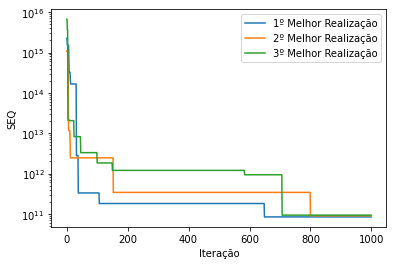

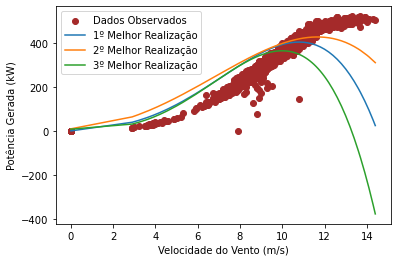

In [56]:
import numpy as np
import matplotlib.pyplot as plt
import time
def input_matrix(x, order):
    X = np.empty((x.shape[0], order + 1))
    for i in range(order+1):
        if i == 0:
            X[:,i] = 1
        else:
            X[:,i] = np.power(x,i)
    
    return X
    
data = np.genfromtxt("aerogerador.dat")
x = data[:,0]
y = data[:,1]

k = 4
X = input_matrix(x, order = k)

Nr = 5
Ns = 1000
M_best_r = []
FO_best_r = []
FO_s_r = []

tic = time.perf_counter()
for r in range(Nr):
    
    M_best = np.random.uniform(-5.5, 11, size = (k+1,1))
    FO_best = np.power(y - np.dot(X, M_best), 2).sum()
    FO_s = []
    for s in range(Ns):
        
        M_cand = M_best + np.random.normal(loc = 0, scale = 1, size = (k+1,1))
        M_cand[M_cand < -1], M_cand[M_cand > 10]  = -1, 10
        y_pred = np.dot(X, M_cand)
        toc = time.perf_counter()

        FO = np.power(y - y_pred, 2).sum()
        
        if FO < FO_best:
            FO_best = FO
            M_best = M_cand

        FO_s.append(FO_best)
    FO_s_r.append(FO_s)
    M_best_r.append(M_best)
    FO_best_r.append(FO_best)
    
toc = time.perf_counter()

#Melhores 3 Realizações
FO_s_r = np.array(FO_s_r)
FO_best_r = np.array(FO_best_r)
M_best_r = np.array(M_best_r)
sorted_index = np.argsort(FO_best_r)

FO_s_r = FO_s_r[sorted_index]
FO_best_r = FO_best_r[sorted_index]
M_best_r = M_best_r[sorted_index]

print("Coeficientes da Melhor Realização\n{}".format(M_best_r[0]))
print("Coeficientes da Segunda Melhor Realização\n{}".format(M_best_r[1]))
print("Coeficientes da Terceira Melhor Realização\n{}".format(M_best_r[2]))

#Curvas de Convergência para as três melhores realizações
fig, ax = plt.subplots()
for i in range(0,3):
    ax.plot(FO_s_r[i], label = "{}º Melhor Realização".format(i+1))
ax.legend()
ax.set_yscale("log")
ax.set_ylabel("SEQ")
ax.set_xlabel("Iteração");

#Curvas de regressão das três melhores realizações
fig_1, ax_1 = plt.subplots()
ax_1.scatter(x, y, c = "brown", label = "Dados Observados", zorder = 1)
for i in range(0,3):
    ax_1.plot(x, np.dot(X, M_best_r[i]), label = "{}º Melhor Realização".format(i+1))
ax_1.legend(loc = "upper left")
ax_1.set_xlabel("Velocidade do Vento (m/s)")
ax_1.set_ylabel("Potência Gerada (kW)");

print("Tempo de Simulação = {:.3f} segundos, Número de iterações = {}, Número de Rodadas = {}".format(toc-tic, Ns, Nr))



**Forneça as curvas de convergência para as 3 melhores realizações (i.e. diferentes inicializações) do processo de busca**

As curvas de convergência para as 3 melhores realizações são apresentadas para as 1000 iterações executadas no seus processos de busca com LRS. O comportamento das curvas de convergência é característico de métodos de busca aleatória que atualizam a solução candidata apenas em situações de melhoria do desempenho. É possível observar patamares de estabilidade ao longo das curvas que se estendem por várias iterações, locais onde a solução candidata fica presa em um mínimo local, e os degraus que evidenciam o achado uma nova solução melhor que a anterior 

Os coeficientes do polinômio do quarto grau para a melhor, 2° melhor e 3° melhor realizações do LRS e os coeficientes obtidos com o método OLS são apresentados na tabela abaixo.

|Coef. | LRS (Melhor Realização) | LRS (2° Melhor)|LRS (3° Melhor)| OLS |
| :- | :- | :- | :- | :- |
|$a_{0}$ | 0,635 | 10,000 | 8,395 | -0,391 |
|$a_{1}$ | 7,535 | 3,818 | 0,114 | 10,373 |
|$a_{2}$ | -0,820 | 5,071 | -1,000 | -5,004 |
|$a_{3}$ | 1,242 | 0,099 | 1,627 | 1,434  |
|$a_{4}$ | -0,084 | -0,026 | -0,117 | -0,068 |

**Os valores dos coeficientes obtidos via GRS/LRS coincidem com os obtidos pelo método OLS?**

Os coeficientes obtidos para as três melhores realizações do LRS divergem dos coeficientes obtidos com o método OLS. Pode-se observar certa semelhança em alguns coeficientes da melhor realização do LRS e os coeficientes do OLS, tais como: $a_{4}$ e $a_{3}$.

Com relação às curvas de regressão, observa-se que nenhuma das três melhores realizações do LRS se ajustam de maneira satisfatória a dispersão dos dados observados com 1000 iterações. Provavelmente, o número de iterações deveria ser bem maior, porém o custo computacional aumentaria proporcionalmente. Inclusive, para 5 realizações de 1000 iterações, o custo computacional já foi elevado, necessitando de 1698 segundos para execução dessas buscas.

O número de parâmetros a ser otimizado dificulta essa tarefa com um método de busca aleatória, pois as pertubações aleatórias ocorrem em quatro parâmetros, facilitando a estabilização da busca em um mínimo local.

**O resultado final (i.e. valores dos coeficientes) é sempre o mesmo para diferentes rodadas/repetições dos métodos GRS/LRS?**

Não, como pode ser observado para as três melhores realizções do LRS, os coeficientes da melhor solução obtida ao final das iterações varia. Essa variação se deve, principalmente, à inicialização aleatória dos coeficientes do polinômio, fazendo com que as buscas para minimizar a Função Objetivo partam de lugares diferentes do espaço de busca. Para os diferentes locais de partida, os caminhos para minimização da Função Objetivo também serão diferentes, podendo ocorrer situações em que a busca estacione em um mínimo local e permaneça nele até o final das interações.

***

#### <b>Questão 03 - Ajuste Polinomal - *Particle Swarm Optimization* - Dados Aerogerador </b>

##### *Particle Swarm Optimization (PSO)* - Função Objetivo SEQ

Rodada 1, Coeficientes do Melhor indivíduo:
[ 6.14105308  0.82836125 -2.66746007  1.22891817 -0.06143918]
Rodada 2, Coeficientes do Melhor indivíduo:
[ 3.07473103 11.         -5.5         1.49841704 -0.07011225]
Rodada 3, Coeficientes do Melhor indivíduo:
[ 8.88337723  9.37237655 -4.9914023   1.42520993 -0.06688996]
Rodada 4, Coeficientes do Melhor indivíduo:
[11.         -3.19582818 -1.88630046  1.1703051  -0.05997359]
Rodada 5, Coeficientes do Melhor indivíduo:
[-0.63903796  8.57537395 -2.02268859  0.93383199 -0.04577391]

Tempo de Simulação = 44.331 segundos, Número de iterações = 1000, Número de Rodadas = 5


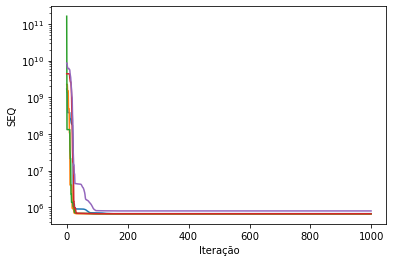

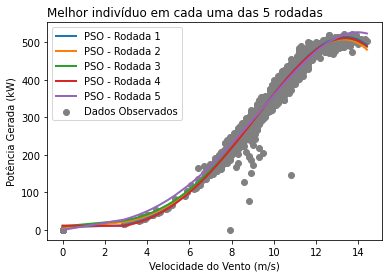

In [62]:
import numpy as np
import matplotlib.pyplot as plt
import time

def input_matrix(x, order):
    X = np.empty((x.shape[0], order + 1))
    for i in range(order+1):
        if i == 0:
            X[:,i] = 1
        else:
            X[:,i] = np.power(x,i)
    
    return X

def Hardamad_Prod(a, b):
    
    prod = np.array([np.multiply(x,y) for x, y in zip(a,b)])

    return prod

def SEQ(M, y_true, X):

    coef = np.power(y_true - np.dot(X, M), 2).sum()

    return coef

data = np.genfromtxt("aerogerador.dat")
x = data[:,0]
y = data[:,1]

Ns = 1000
Nr = 5

k = 4
p = 20 #Num de partículas
w, c1, c2 = 0.4, 2.05, 2.05
l_limit, u_limit = -5.5, 11

X = input_matrix(x, order = k)

fig, ax = plt.subplots()
fig_b, ax_b = plt.subplots()
tic = time.perf_counter()

for r in range(Nr):

    Mi = np.random.uniform(l_limit, u_limit, size = (p, k+1))
    Vi = np.random.uniform(-np.abs(u_limit - l_limit), np.abs(u_limit - l_limit), size = (p, 1))
    Fg_best_r = []
    
    for s in range(Ns):
        if s == 0:
            Mi_best = Mi
            Fi_best = np.apply_along_axis(SEQ, 1, Mi_best, y, X) #Aplicar a função EQM para cada candidato
            Mg_best = Mi_best[np.argmin(Fi_best)]
            Fg_best = Fi_best[np.argmin(Fi_best)]
        
        Vcog = Hardamad_Prod(np.random.uniform(0,1,size = (p,1)), Mi_best - Mi)
        Vsoc = Hardamad_Prod(np.random.uniform(0,1,size = (p,1)), Mg_best - Mi)

        Vi = w*Vi + np.dot(c1, Vcog) + np.dot(c2, Vsoc)
        Mi = Mi + Vi

        Mi[Mi > u_limit] = u_limit
        Mi[Mi < l_limit] = l_limit

        DF = np.apply_along_axis(SEQ, 1, Mi, y, X) - Fi_best

        Mi_best[np.where(DF < 0)] = Mi[np.where(DF < 0)]
        Fi_best = np.apply_along_axis(SEQ, 1, Mi_best, y, X)

        Mg_best = Mi_best[np.argmin(Fi_best)]
        Fg_best = Fi_best[np.argmin(Fi_best)]

        Fg_best_r.append(Fg_best)

    print("Rodada {}, Coeficientes do Melhor indivíduo:".format(r+1))
    print(Mg_best)
    

    ax.plot(Fg_best_r, label = "SEQ Rodada {}".format(r+1))
    ax_b.plot(x, np.dot(X, Mg_best), label = "PSO - Rodada {}".format(r+1), lw = 2, zorder = 2) 
    
toc = time.perf_counter()
print("\nTempo de Simulação = {:.3f} segundos, Número de iterações = {}, Número de Rodadas = {}".format(toc-tic, Ns, Nr))

ax.set_yscale("log")
ax.set_ylabel("SEQ")
ax.set_xlabel("Iteração");


ax_b.scatter(x,y, c = "gray", label = "Dados Observados", zorder = 1)
ax_b.set_xlabel("Velocidade do Vento (m/s)")
ax_b.set_ylabel("Potência Gerada (kW)")
ax_b.set_title("Melhor indivíduo em cada uma das {} rodadas".format(Nr), loc = "left")
ax_b.legend();


A metaheurística populacional escolhida foi o *Particle Swarm Optimization* (PSO). Considerou-se um enxame de 20 partículas para exploração do espaço de busca. Definiu-se os coeficientes de inércia $(w)$ e coeficientes de aceleração ($c_{1}$ e $c_{2}$) como iguais a $0,4$, $2,05$ e $2,05$, respectivamente. Os limites de busca superior e inferior para todos os coeficientes foi, respectivamente, $-5,5$ e $11$. A função objetivo considerada foi a Soma dos Erros Quadráticos (SEQ).

**Ao comparar as curvas de convergência das metaheurísticas simples (GRS/LRS) com as das metaheurísticas populacionais (GA/PSO), houve melhoria na velocidade de convergência para solução ótima**

Em relação as curvas de convergência do PSO, para todas as 5 rodadas, pode-se observar uma rápida convergência para solução ótima, ocorrendo antes da centésima iteração em todos os casos. Comparando com as curvas de convergência do LRS obtidas para as três melhores realizações, é indiscutível a melhoria na velocidade de convergência do PSO para a solução-ótima. Além da velocidade de convergência, também é indiscutível a melhoria do ajuste das curvas de regressão à dispersão dos dados com as soluções-ótimas obtidas com o PSO em relação às obtidas com o LRS, ambas, considerando um processo de busca com 1000 iterações.

A convergência mais rápida e de maior qualidade pode ser atribuída ao fato de que cada partícula do enxame possui uma percepção local do seu desempenho e a uma percepção global do desempenho dos demais membros do enxame, permitindo que o espaço de busca seja explorado de forma mais ampla através da combinação de uma busca local com uma busca global. O LRS, por sua vez, realiza apenas uma busca local, movendo-se apenas quando houver melhoria no desempenho da solução candidata, portanto, é bastante dependente da região que a solução candidata foi inicializada.

**Os valores dos coeficientes obtidos via GA/PSO coincidem com os obtidos nas Questões 1 ou 2?**

A Tabela abaixo apresenta os coeficientes do polinômio do quarto grau obtidos para cada uma das 5 rodadas do PSO e os coeficiente obtidos através do OLS (1° questão). Observa-se que a rodada 5 do PSO foi a que mais aproximou todos os seus coeficientes obtidos aos obtidos pelo OLS. É digno de nota que a semelhança dos coeficiente aumenta à medida que se aumenta a ordem do termo que eles estão associados. Por exemplo, a partir do coeficiente associado ao termo de segunda ordem $(a_{2})$, observa-se que os valores dos coeficientes dos termos de terceira e quarta ordem são bem semelhantes, inclusive ao resultado obtido no OLS. 

| | $a_{0}$ | $a_{1}$ | $a_{2}$ | $a_{3}$ | $a_{4}$ |
| :- | :- | :- | :- | :- | :- |
|PSO (r = 1) | 6,141| 0,828 | -2,667 | 1,229 | -0,061 |
|PSO (r = 2)| 3,075 | 11,000 | -5,5 | 1,498 | -0,070 |
|PSO (r = 3) | 8,883 | 9,372 | -4,991 | 1,425 | -0,067 |
|PSO (r = 4) | 11 | -3,196 | -1,886 | 1,170  | -0,060 |
|PSO (r = 5) | -0,639 | 8,575 | -2,023 | 0,934 | -0,046 |
|OLS | -0,391 | 10,373 | -5,004 | 1,434 | -0,068 |

**Houve melhoria na solução obtida, que justificasse o aumento do custo computacional**

Em relação ao LRS, houve melhorias tanto na solução obtida quanto no custo computacional. Para a realização de 5 buscas, cada uma com 1000 iterações, o LRS teve um tempo de execução igual a 1698 segundos enquanto o PSO executou em apenas 44,3 segundos. Além disso, as curvas de regressão obtidas com os coeficientes oriundos da melhor partícula de cada rodada do PSO se ajustaram de forma excelente à dispersão dos dados observados (velocidade do vento x Potência Gerada).

**O resultado final (i.e valores dos coeficientes) é sempre o mesmo para diferentes rodadas/repetições dos métodos GA/PSO?**

Apesar da rápida convergência e do bom desempenho do PSO, ele ainda é um método de otimização baseado na geração de uma população posicionada aleatoriamente no espaço de busca. Dessa forma, a depender do posicionamento dessas partículas, diferentes caminhos podem ser traçados para otimização da Função Objetivo, podendo gerar soluções ótimas diferentes para cada uma das rodadas.

Na presente aplicação, apesar da semelhança entre as curvas de regressão, os coeficientes variaram em todas as rodadas do PSO. Supõe-se que essa grande variação entre as rodadas pode ser oriunda do grande intervalo de variação considerado para todos os coeficientes $[-5.5, 11]$, possibilitando uma maior diversidade na posição inicial dos enxames. Apesar desse empencilho com os limites do intervalo de variação, fica evidente o excelente desempenho do PSO que, mesmo com um grande espaço de busca, conseguiu uma rápida convergência para soluções ótimas que retornaram curvas de regressão bem ajustadas à dispersão dos dados.

***

#### <b>Questão 04 - Ajuste Polinomal - *Particle Swarm Optimization* - Dados Aerogerador </b>

##### *Particle Swarm Optimization (PSO)* - Função Objetivo SEA

Rodada 1, Coeficientes do Melhor indivíduo:
[11.         -0.13818474 -2.69838675  1.25185373 -0.06295109]
Rodada 2, Coeficientes do Melhor indivíduo:
[ 3.81455039  3.01127825 -3.18229868  1.28251872 -0.06361522]
Rodada 3, Coeficientes do Melhor indivíduo:
[ 0.1730034  -2.61603688 -1.0180199   1.04509176 -0.05553196]
Rodada 4, Coeficientes do Melhor indivíduo:
[11.         -2.24793679 -1.98908082  1.17538281 -0.06030807]
Rodada 5, Coeficientes do Melhor indivíduo:
[ 3.11220799  9.20923386 -5.5         1.59885874 -0.07769951]

Tempo de Simulação = 7.238 segundos, Número de iterações = 1000, Número de Rodadas = 5


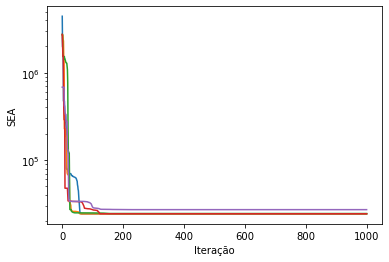

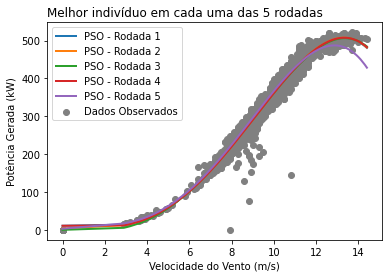

In [67]:
import numpy as np
import matplotlib.pyplot as plt
import time

def input_matrix(x, order):
    X = np.empty((x.shape[0], order + 1))
    for i in range(order+1):
        if i == 0:
            X[:,i] = 1
        else:
            X[:,i] = np.power(x,i)
    
    return X

def Hardamad_Prod(a, b):
    
    prod = np.array([np.multiply(x,y) for x, y in zip(a,b)])

    return prod

def SEA(M, y_true, X):

    coef = np.abs(y_true - np.dot(X, M)).sum()

    return coef

data = np.genfromtxt("aerogerador.dat")
x = data[:,0]
y = data[:,1]

Ns = 1000
Nr = 5

k = 4
p = 20 #Num de partículas
w, c1, c2 = 0.4, 2.05, 2.05
l_limit, u_limit = -5.5, 11

X = input_matrix(x, order = k)

fig, ax = plt.subplots()
fig_b, ax_b = plt.subplots()
tic = time.perf_counter()

for r in range(Nr):

    Mi = np.random.uniform(l_limit, u_limit, size = (p, k+1))
    Vi = np.random.uniform(-np.abs(u_limit - l_limit), np.abs(u_limit - l_limit), size = (p, 1))
    Fg_best_r = []
    
    for s in range(Ns):
        if s == 0:
            Mi_best = Mi
            Fi_best = np.apply_along_axis(SEA, 1, Mi_best, y, X) #Aplicar a função EQM para cada candidato
            Mg_best = Mi_best[np.argmin(Fi_best)]
            Fg_best = Fi_best[np.argmin(Fi_best)]
        
        Vcog = Hardamad_Prod(np.random.uniform(0,1,size = (p,1)), Mi_best - Mi)
        Vsoc = Hardamad_Prod(np.random.uniform(0,1,size = (p,1)), Mg_best - Mi)

        Vi = w*Vi + np.dot(c1, Vcog) + np.dot(c2, Vsoc)
        Mi = Mi + Vi

        Mi[Mi > u_limit] = u_limit
        Mi[Mi < l_limit] = l_limit

        DF = np.apply_along_axis(SEA, 1, Mi, y, X) - Fi_best

        Mi_best[np.where(DF < 0)] = Mi[np.where(DF < 0)]
        Fi_best = np.apply_along_axis(SEA, 1, Mi_best, y, X)

        Mg_best = Mi_best[np.argmin(Fi_best)]
        Fg_best = Fi_best[np.argmin(Fi_best)]

        Fg_best_r.append(Fg_best)

    print("Rodada {}, Coeficientes do Melhor indivíduo:".format(r+1))
    print(Mg_best)
    

    ax.plot(Fg_best_r, label = "EQM Rodada {}".format(r+1))
    ax_b.plot(x, np.dot(X, Mg_best), label = "PSO - Rodada {}".format(r+1), lw = 2, zorder = 2) 
    
toc = time.perf_counter()
print("\nTempo de Simulação = {:.3f} segundos, Número de iterações = {}, Número de Rodadas = {}".format(toc-tic, Ns, Nr))

ax.set_yscale("log")
ax.set_ylabel("SEA")
ax.set_xlabel("Iteração");


ax_b.scatter(x,y, c = "gray", label = "Dados Observados", zorder = 1)
ax_b.set_xlabel("Velocidade do Vento (m/s)")
ax_b.set_ylabel("Potência Gerada (kW)")
ax_b.set_title("Melhor indivíduo em cada uma das {} rodadas".format(Nr), loc = "left")
ax_b.legend();


A aplicação do PSO nessa Questão 04 considerou os mesmo parâmetros do PSO implementado na Questão 03. Considerou-se um enxame de 20 partículas para exploração do espaço de busca. Definiu-se os coeficientes de inércia $(w)$ e coeficientes de aceleração ($c_{1}$ e $c_{2}$) como iguais a $0,4$, $2,05$ e $2,05$, respectivamente. Os limites de busca superior e inferior para todos os coeficientes foi, respectivamente, $-5,5$ e $11$. A única diferença consistiu na mudança da função objetivo para a Soma dos Erros Absolutos (SEA).

Inicialmente, é digno de nota o tempo de processamento do PSO considerando a SEA e a SEQ como função objetivo. Para a SEA, o tempo de execução para 5 buscas de 1000 iterações foi 7,23 segundos, enquanto que para o SEQ, para a mesma busca, o tempo de execução foi de 44,3 segundos. A SEA, como função objetivo, reduziu em mais de cinco vezes o tempo de execução do PSO. Essa redução, provavelmente, está relacionada a redução na magnitude dos valores da SEA em relação ao SEQ, uma vez que essa última considera o somatório do erro elevado ao quadrado.

**Os valores dos coeficientes obtidos usando a SEA coincidem com os obtidos nas Questões 1 a 3?**

A Tabela abaixo apresenta os coeficientes obtidos para cada uma das 5 rodadas do PSO (SEA), PSO (SEQ) e OLS. Observa-se que os coeficientes variam para as diferentes rodadas do PSO com SEA, todavia pode-se observar, por exemplo, que as rodadas $r = 1$ e $r = 4$ obtiveram coeficientes semelhantes. Os coeficientes do PSO com SEA em relação aos do PSO com SEQ e aos do OLS também variaram entre si, todavia algumas semelhanças podem ser destacadas.

Observa-se uma semelhança entre a rodada $r = 4$ do PSO-SEA com a rodada $r = 4$ do PSO-SEQ; a rodada $r = 5$ do PSO-SEA com os coeficientes do OLS, exceto pelo coeficiente $a_{0}$. Destaca-se também a semelhança entre os coeficientes dos elementos de ordem 3 e 4 do polinomio ($a_{3}$ e $a_{4}$) que são bem próximos entre as diferentes rodadas do PSO-SEA e também entre os coeficientes obtidos no PSO-SEQ e OLS.

| | $a_{0}$ | $a_{1}$ | $a_{2}$ | $a_{3}$ | $a_{4}$ |
| :- | :- | :- | :- | :- | :- |
|PSO-SEA (r = 1) | 11 | -0,138 | -2,698 | 1,252 | -0,063 |
|PSO-SEA (r = 2) | 3,815 | 3,011 | -3,182 | 1,283 | -0,064 |
|PSO-SEA (r = 3) | 0,173 | -2,616 | -1,012 | 1,045 | -0,056 |
|PSO-SEA (r = 4) | 11 | -2,248 | -1,989 | 1,175  | -0,060 |
|PSO-SEA (r = 5) | 3,112 | 9,209 | -5,5 | 1,599 | -0,078|
|PSO-SEQ (r = 1) | 6,141| 0,828 | -2,667 | 1,229 | -0,061 |
|PSO-SEQ (r = 2) | 3,075 | 11,000 | -5,5 | 1,498 | -0,070 |
|PSO-SEQ (r = 3) | 8,883 | 9,372 | -4,991 | 1,425 | -0,067 |
|PSO-SEQ (r = 4) | 11 | -3,196 | -1,886 | 1,170  | -0,060 |
|PSO-SEQ (r = 5) | -0,639 | 8,575 | -2,023 | 0,934 | -0,046 |
|OLS | -0,391 | 10,373 | -5,004 | 1,434 | -0,068 |

**Com relação à norma do vetor de coeficientes ótimos, houve aluma mudança em relação às soluções obtidas nas questões anteriores? Aumentou? Diminuiu?**

As normas dos vetores de coeficientes ótimos obtidos com o PSO-SEA e PSO-SEQ são apresentadas na tabela abaixo. As normas variam entre as rodadas, tanto para o PSO-SEA quanto para o PSO-SEQ, uma vez que os vetores de coeficientes ótimos também variam entre cada uma das rodadas. 

Em relação à mudança da função objetivo do PSO, não é possível concluir se ela promove uma mudança na norma dos vetores dos coeficientes. Se tormarmos a média das normas das diferentes rodadas, vemos que o PSO-SEA retorna uma norma média de 8,618 e o PSO-SEQ um valor médio de 10,818, todavia, mais rodadas seriam necessárias para confirmar esse comportamento.

| | $a_{0}$ | $a_{1}$ | $a_{2}$ | $a_{3}$ | $a_{4}$ | Norma |
| :- | :- | :- | :- | :- | :- | :- |
|PSO-SEA (r = 1) | 11 | -0,138 | -2,698 | 1,252 | -0,063 | 11,396 |
|PSO-SEA (r = 2) | 3,815 | 3,011 | -3,182 | 1,283 | -0,064 | 5,949 |
|PSO-SEA (r = 3) | 0,173 | -2,616 | -1,012 | 1,045 | -0,056 | 3,001 |
|PSO-SEA (r = 4) | 11 | -2,248 | -1,989 | 1,175  | -0,060 | 11,463 |
|PSO-SEA (r = 5) | 3,112 | 9,209 | -5,5 | 1,599 | -0,078| 11,283 |
|PSO-SEQ (r = 1) | 6,141| 0,828 | -2,667 | 1,229 | -0,061 | 6,858 |
|PSO-SEQ (r = 2) | 3,075 | 11,000 | -5,5 | 1,498 | -0,070 | 12,765 |
|PSO-SEQ (r = 3) | 8,883 | 9,372 | -4,991 | 1,425 | -0,067 | 13,918 |
|PSO-SEQ (r = 4) | 11 | -3,196 | -1,886 | 1,170  | -0,060 | 11,668 |
|PSO-SEQ (r = 5) | -0,639 | 8,575 | -2,023 | 0,934 | -0,046 | 8,883 |



***

In [72]:
# Rodada 1, Coeficientes do Melhor indivíduo:
r1_SEQ = np.array([6.14105308, 0.82836125, -2.66746007, 1.22891817, -0.06143918])
# Rodada 2, Coeficientes do Melhor indivíduo:
r2_SEQ = np.array([3.07473103, 11, -5.5, 1.49841704, -0.07011225])
# Rodada 3, Coeficientes do Melhor indivíduo:
r3_SEQ = np.array([8.88337723, 9.37237655, -4.9914023, 1.42520993, -0.06688996])
# Rodada 4, Coeficientes do Melhor indivíduo:
r4_SEQ = np.array([11, -3.19582818, -1.88630046, 1.1703051, -0.05997359])
# Rodada 5, Coeficientes do Melhor indivíduo:
r5_SEQ = np.array([-0.63903796, 8.57537395, -2.02268859, 0.93383199, -0.04577391])

#Rodada 1, Coeficientes do Melhor indivíduo:
r1_SEA = np.array([11, -0.13818474, -2.69838675, 1.25185373, -0.06295109])
#Rodada 2, Coeficientes do Melhor indivíduo:
r2_SEA = np.array([3.81455039, 3.01127825, -3.18229868, 1.28251872, -0.06361522])
#Rodada 3, Coeficientes do Melhor indivíduo:
r3_SEA = np.array([0.1730034, -2.61603688, -1.0180199, 1.04509176, -0.05553196])
#Rodada 4, Coeficientes do Melhor indivíduo:
r4_SEA = np.array([11, -2.24793679, -1.98908082, 1.17538281, -0.06030807])
#Rodada 5, Coeficientes do Melhor indivíduo:
r5_SEA = np.array([3.11220799, 9.20923386, -5.5, 1.59885874, -0.07769951])

print("PSO-SEQ r1 - Norma = {:.3f}".format(np.linalg.norm(r1_SEQ)))
print("PSO-SEQ r2 - Norma = {:.3f}".format(np.linalg.norm(r2_SEQ)))
print("PSO-SEQ r3 - Norma = {:.3f}".format(np.linalg.norm(r3_SEQ)))
print("PSO SEQ r4 - Norma = {:.3f}".format(np.linalg.norm(r4_SEQ)))
print("PSO SEQ r5 - Norma = {:.3f}\n".format(np.linalg.norm(r5_SEQ)))

print("PSO SEA r1 - Norma = {:.3f}".format(np.linalg.norm(r1_SEA)))
print("PSO SEA r2 - Norma = {:.3f}".format(np.linalg.norm(r2_SEA)))
print("PSO SEA r3 - Norma = {:.3f}".format(np.linalg.norm(r3_SEA)))
print("PSO SEA r4 - Norma = {:.3f}".format(np.linalg.norm(r4_SEA)))
print("PSO SEA r5 - Norma = {:.3f}".format(np.linalg.norm(r5_SEA)))



PSO SEQ r1 - Norma = 6.858
PSO SEQ r2 - Norma = 12.765
PSO SEQ r3 - Norma = 13.918
PSO SEQ r4 - Norma = 11.668
PSO SEQ r5 - Norma = 8.883

PSO SEA r1 - Norma = 11.396
PSO SEA r2 - Norma = 5.949
PSO SEA r3 - Norma = 3.001
PSO SEA r4 - Norma = 11.463
PSO SEA r5 - Norma = 11.283
